<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/Linear_regression_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Sprint Objective

- Understanding Linear Regression through Scratch
- Get used to object-oriented implementation
- Putting math into code

In [2]:
import numpy as np

class ScratchLinearRegression():
    """
    Linear regression implemented from scratch

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    no_bias : bool
        Whether to exclude bias term
    verbose : bool
        Whether to print progress

    Attributes
    ----------
    self.coef_ : ndarray, shape(n_features,)
        Learned coefficients
    self.loss : ndarray, shape(self.iter,)
        Training loss history
    self.val_loss : ndarray, shape(self.iter,)
        Validation loss history
    """
    # Let's fill in linear_hypothesis and update the _init method to initialize he weights correctly.

    def __init__(self, num_iter, lr, no_bias=False, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose

        # Initialize attributes
        self.coef_ = None
        self.loss = np.zeros(num_iter)
        self.val_loss = np.zeros(num_iter)

    def _linear_hypothesis(self, X):
        """
        Linear regression hypothesis function (hθ(x) = θ.T @ x)

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input features

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Predicted values
        """
        return X @ self.coef_
        """
        【problem2】Steepest descent
        Please implement training using the gradient descent method.
        Add the _gradient_descent method for updating the parameters expressed by the following formula, and call it from the fit method.
        """
        def fit(self, X, y, X_val=None, y_val=None):
          """
          Fit linear regression model

          Parameters
          ----------
          X : ndarray, shape (n_samples, n_features)
              Training features
          y : ndarray, shape (n_samples,)
              Training targets
          X_val : ndarray, shape (n_samples, n_features), optional
              Validation features
          y_val : ndarray, shape (n_samples,), optional
              Validation targets
          """
        # Add bias term if needed
        if not self.no_bias:
            X = np.hstack([np.ones(X.shape[0], 1), X])
            if X_val is not None:
                X_val = np.hstack([np.ones(X_val.shape[0], 1), X_val])

        # Initialize coefficients
        self.coef_ = np.zeros(X.shape[1])

        # Gradient descent
        for i in range(self.num_iter):
            # Calculate predictions and errors
            pred = self._linear_hypothesis(X)
            error = pred - y

            # Update coefficients
            gradient = X.T @ error / len(y)
            self.coef_ -= self.lr * gradient

            # Calculate losses
            self.loss[i] = np.mean(error ** 2)
            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = np.mean((val_pred - y_val) ** 2)

            # Print progress if verbose
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Train Loss = {self.loss[i]:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss = {self.val_loss[i]:.4f}")
                else:
                    print()

                    """
                    We need to implement the predict method of the ScratchLinearRegression class using the hypothesis function.
                    This function gives the model’s predictions by performing a dot product between the input matrix X and the learned parameters theta (stored in self.coef_)
                    """

    def predict(self, X):
        """
        Predict using linear regression model

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input features

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted values
        """
        if not self.no_bias:
            X = np.hstack([np.ones(X.shape[0], 1), X])
        return self._linear_hypothesis(X)

【problem 4】Mean squared error

In [3]:
# implementation of the Mean Squared Error (MSE) function, as a standalone function

import numpy as np

def MSE(y_pred, y):
    """
    Calculation of mean square error

    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
        Estimated values
    y : ndarray, shape (n_samples,)
        Correct (true) values

    Returns
    ----------
    mse : numpy.float
        Mean squared error
    """
    mse = np.mean((y_pred - y) ** 2)
    return mse


This function computes the average of the squared differences between predicted values and actual target values.

It can be reused across various regression models, not just the ScratchLinearRegression.

【problem 5】Objective function

Implement the objective function (loss function) of linear regression represented by the following formula and be sure to record this inself.loss,self.val_loss.

- This function should be called inside the training loop within the fit() method, after every epoch or batch.

- self.loss and self.val_loss should be initialized as empty lists in the class constructor (__init__).

In [4]:
"""
we will:
Use the Mean Squared Error (MSE) function from Problem 4.
Divide the MSE by 2, as the gradient descent objective function is defined.
"""
def _calculate_loss(self, X, y, val=False):
    """
    Calculate the loss (objective function) and store it in self.loss or self.val_loss

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Feature data
    y : ndarray, shape (n_samples,)
        Correct values
    val : bool, default=False
        If True, store in self.val_loss instead of self.loss
    """
    y_pred = self.predict(X)
    mse = MSE(y_pred, y)
    loss = 0.5 * mse

    if val:
        self.val_loss.append(loss)
    else:
        self.loss.append(loss)


###Verification

Problem 6 Learning and Estimation

a. Load and prepare data

In [5]:
# loading and preparing the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

# Select numeric columns only and drop rows with missing values
numeric_data = data.select_dtypes(include=['int64', 'float64']).dropna()

# Define features and target
X = numeric_data.drop("SalePrice", axis=1).values
y = numeric_data["SalePrice"].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


b. Fitting Scratch Implementation

In [6]:
import numpy as np

class ScratchLinearRegression():
    """
    Linear regression implemented from scratch

    Parameters
    ----------
    num_iter : int
        Number of iterations
    lr : float
        Learning rate
    no_bias : bool
        Whether to exclude bias term
    verbose : bool
        Whether to print progress

    Attributes
    ----------
    self.coef_ : ndarray, shape(n_features,)
        Learned coefficients
    self.loss : ndarray, shape(self.iter,)
        Training loss history
    self.val_loss : ndarray, shape(self.iter,)
        Validation loss history
    """
    # Let's fill in linear_hypothesis and update the _init method to initialize the weights correctly.

    def __init__(self, num_iter, lr, no_bias=False, verbose=False):
        self.num_iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose

        # Initialize attributes
        self.coef_ = None
        self.loss = np.zeros(num_iter)
        self.val_loss = np.zeros(num_iter)

    def _linear_hypothesis(self, X):
        """
        Linear regression hypothesis function (hθ(x) = θ.T @ x)

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input features

        Returns
        -------
        ndarray, shape (n_samples, 1)
            Predicted values
        """
        return X @ self.coef_

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Fit linear regression model

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Training features
        y : ndarray, shape (n_samples,)
            Training targets
        X_val : ndarray, shape (n_samples, n_features), optional
            Validation features
        y_val : ndarray, shape (n_samples,), optional
            Validation targets
        """
        # Add bias term if needed
        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])

        # Initialize coefficients
        self.coef_ = np.zeros(X.shape[1])

        # Gradient descent
        for i in range(self.num_iter):
            # Calculate predictions and errors
            pred = self._linear_hypothesis(X)
            error = pred - y

            # Update coefficients
            gradient = X.T @ error / len(y)
            self.coef_ -= self.lr * gradient

            # Calculate losses
            self.loss[i] = np.mean(error ** 2)
            if X_val is not None and y_val is not None:
                val_pred = self._linear_hypothesis(X_val)
                self.val_loss[i] = np.mean((val_pred - y_val) ** 2)

            # Print progress if verbose
            if self.verbose and i % 100 == 0:
                print(f"Iteration {i}: Train Loss = {self.loss[i]:.4f}", end="")
                if X_val is not None:
                    print(f", Val Loss = {self.val_loss[i]:.4f}")
                else:
                    print()


    def predict(self, X):
        """
        Predict using linear regression model

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Input features

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted values
        """
        if not self.no_bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._linear_hypothesis(X)

In [7]:
# fitting scratch implementation
model_scratch = ScratchLinearRegression(num_iter=1000, lr=0.01, verbose=True)
model_scratch.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)

# Predictions
y_pred_scratch = model_scratch.predict(X_test_scaled)

Iteration 0: Train Loss = 40220445303.1987, Val Loss = 43883538642.8602
Iteration 100: Train Loss = 5908265143.6164, Val Loss = 6419735974.4600
Iteration 200: Train Loss = 1937023965.2345, Val Loss = 2349288896.6657
Iteration 300: Train Loss = 1385723127.8088, Val Loss = 1742542712.1251
Iteration 400: Train Loss = 1300623031.9970, Val Loss = 1634306933.6563
Iteration 500: Train Loss = 1282628225.0508, Val Loss = 1607888288.5437
Iteration 600: Train Loss = 1276264118.5308, Val Loss = 1599028812.7182
Iteration 700: Train Loss = 1272989560.9043, Val Loss = 1595472339.0863
Iteration 800: Train Loss = 1271034700.6813, Val Loss = 1593969031.5978
Iteration 900: Train Loss = 1269802393.0866, Val Loss = 1593355122.2352


c. Fitting Scikit-learn's LinearRegression for Comparison

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_sklearn = LinearRegression()
model_sklearn.fit(X_train_scaled, y_train)
y_pred_sklearn = model_sklearn.predict(X_test_scaled)


d. comparing results

In [9]:
mse_scratch = mean_squared_error(y_test, y_pred_scratch)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("Scratch MSE:", mse_scratch)
print("Sklearn MSE:", mse_sklearn)


Scratch MSE: 1593136517.653105
Sklearn MSE: 1591724600.5769076


Problem 7 Plotting the learning curve

Visualising through loss-curve

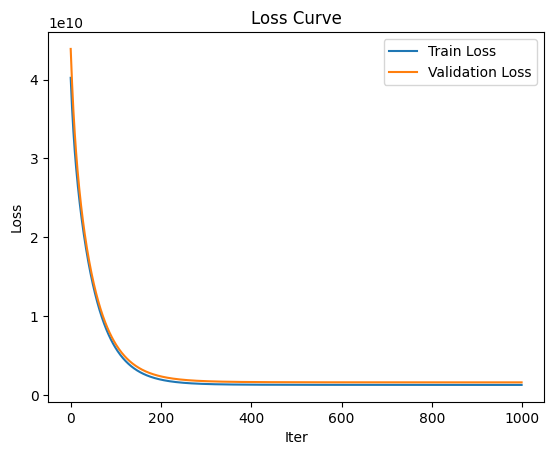

In [10]:
import matplotlib.pyplot as plt

plt.plot(model_scratch.loss, label='Train Loss')
plt.plot(model_scratch.val_loss, label='Validation Loss')
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


Problem 8: Removal of Bias Term — Analysis & Explanation

In [11]:
# since the class is already designed to include or exclude the bias term based on the no_bias flag. We just need to set no_bias=True when creating our model.
# WITHOUT BIAS
model_no_bias = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=True, verbose=False)
model_no_bias.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)

Step 3: Comparing the Results

We can visualize and print the difference:

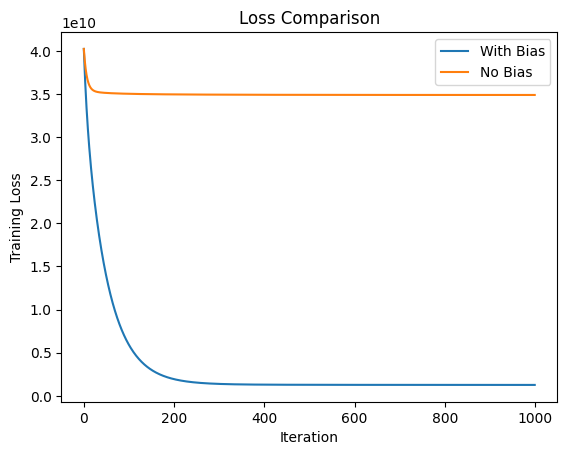

Final Train Loss With Bias: 1269008366.9420
Final Train Loss No Bias: 34882398569.8333


In [13]:
import matplotlib.pyplot as plt

# Create an instance of the model with bias term
model_with_bias = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=False)  # no_bias=False by default, but explicitly set here for clarity
model_with_bias.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)

# Now you can plot and compare
plt.plot(model_with_bias.loss, label='With Bias')
plt.plot(model_no_bias.loss, label='No Bias')
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Loss Comparison')
plt.legend()
plt.show()

print(f"Final Train Loss With Bias: {model_with_bias.loss[-1]:.4f}")
print(f"Final Train Loss No Bias: {model_no_bias.loss[-1]:.4f}")

###Summary: What Does Removing Bias Do?

The bias term allows the model to fit the data even when the output is not centered around zero.

Without bias, the model forces the line to pass through the origin (0,0), which may not be optimal for most real-world datasets.

In most cases, loss without bias will be higher, showing reduced performance.

###【problem 9】(Advance task) Multidimensional feature quantity

- To verify how the learning result changes when using squared or cubed features, we're essentially testing polynomial feature expansion. This allows linear regression to model nonlinear relationships.

In [14]:
# Adding Square or Cube of Features
# 1. manual approach

# Square the features
X_train_squared = X_train_scaled ** 2
X_test_squared = X_test_scaled ** 2

# Concatenate original and squared features
X_train_poly2 = np.hstack((X_train_scaled, X_train_squared))
X_test_poly2 = np.hstack((X_test_scaled, X_test_squared))

# For cube
X_train_cubed = X_train_scaled ** 3
X_test_cubed = X_test_scaled ** 3

X_train_poly3 = np.hstack((X_train_scaled, X_train_squared, X_train_cubed))
X_test_poly3 = np.hstack((X_test_scaled, X_test_squared, X_test_cubed))


In [ ]:
# 2. Fitting Models With Expanded Features
# Original

model_orig = ScratchLinearRegression(num_iter=1000, lr=0.01)
model_orig.fit(X_train_scaled, y_train, X_val=X_test_scaled, y_val=y_test)

# With squared features
model_poly2 = ScratchLinearRegression(num_iter=1000, lr=0.01)
model_poly2.fit(X_train_poly2, y_train, X_val=X_test_poly2, y_val=y_test)

# With squared + cubed features
model_poly3 = ScratchLinearRegression(num_iter=1000, lr=0.01)
model_poly3.fit(X_train_poly3, y_train, X_val=X_test_poly3, y_val=y_test)


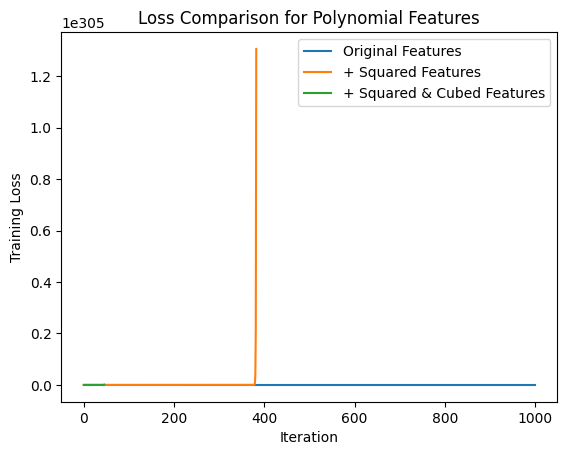

Final Train Loss (Original): 1269008366.9420
Final Train Loss (+Square): nan
Final Train Loss (+Square+Cube): nan


In [25]:
import matplotlib.pyplot as plt

plt.plot(model_orig.loss, label='Original Features')
plt.plot(model_poly2.loss, label='+ Squared Features')
plt.plot(model_poly3.loss, label='+ Squared & Cubed Features')
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Loss Comparison for Polynomial Features")
plt.legend()
plt.show()

print(f"Final Train Loss (Original): {model_orig.loss[-1]:.4f}")
print(f"Final Train Loss (+Square): {model_poly2.loss[-1]:.4f}")
print(f"Final Train Loss (+Square+Cube): {model_poly3.loss[-1]:.4f}")


###Expected Result

- Adding squared features can capture quadratic patterns in the data.

- Adding cubed features allows modeling more complex nonlinear trends.

- However, overfitting may occur if the model becomes too complex without regularization.

###【problem 10】(Advance task) Derivation of update formula

To derive the update formula for the steepest descent method (gradient descent) in linear regression, we start from the loss function and apply calculus to find its gradient with respect to the model parameters.

Let's approach it step-by-step:

---

### 1. **Loss Function (Objective Function)**

The Mean Squared Error (MSE) loss function is given by:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2
$$

Where:

* $m$ is the number of training examples
* $h_\theta(x^{(i)}) = \theta^T x^{(i)}$ is the prediction
* $y^{(i)}$ is the true value

---

###  2. **Gradient Descent Update Rule**

The general rule of gradient descent is:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$

Where:

* $\alpha$ is the learning rate
* $\frac{\partial}{\partial \theta_j} J(\theta)$ is the partial derivative (gradient) of the loss with respect to parameter $\theta_j$

---

###  3. **Compute the Partial Derivative**

Let’s compute the derivative of $J(\theta)$ with respect to $\theta_j$:

$$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{\partial}{\partial \theta_j} \left[ \frac{1}{2m} \sum_{i=1}^{m} \left(\theta^T x^{(i)} - y^{(i)}\right)^2 \right]
$$

Using the chain rule:

$$
= \frac{1}{2m} \sum_{i=1}^{m} 2 \cdot \left(\theta^T x^{(i)} - y^{(i)}\right) \cdot \frac{\partial}{\partial \theta_j} \left(\theta^T x^{(i)} - y^{(i)}\right)
$$

Since $\frac{\partial}{\partial \theta_j} (\theta^T x^{(i)}) = x_j^{(i)}$, we get:

$$
\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left(\theta^T x^{(i)} - y^{(i)}\right) x_j^{(i)}
$$

---

### 4. **Final Update Formula**

Substitute the gradient into the update rule:

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left(\theta^T x^{(i)} - y^{(i)}\right) x_j^{(i)}
$$

This is the steepest descent (gradient descent) update formula used to minimize the cost function in linear regression.

---

The **vectorized form** of the gradient descent update rule for linear regression.

---

### **Recap: Loss Function (MSE)**

$$
J(\theta) = \frac{1}{2m} \| X\theta - y \|^2
$$

Where:

* $X \in \mathbb{R}^{m \times n}$: matrix of input features (each row is an example)
* $y \in \mathbb{R}^{m \times 1}$: vector of true outputs
* $\theta \in \mathbb{R}^{n \times 1}$: vector of parameters (weights)
* $m$: number of training samples

---

### **Gradient (Vectorized)**

The gradient of the cost function with respect to $\theta$ is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

This expression computes the gradient for all $\theta_j$'s at once.

---

###  **Gradient Descent Update Rule (Vectorized)**

The update rule becomes:

$$
\theta := \theta - \alpha \cdot \frac{1}{m} X^T (X\theta - y)
$$

This is both computationally efficient and easy to implement in NumPy or similar libraries.

---

This implementation avoids any explicit for-loops over samples and works efficiently even for large datasets.

In [26]:
### **Python (NumPy) Implementation Example**
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    for _ in range(epochs):
        predictions = X @ theta
        error = predictions - y
        gradient = (1/m) * X.T @ error
        theta = theta - alpha * gradient
    return theta

###【problem 11】(Advance task) Problem of local optimum solution

**Gradient descent** can get stuck in **local minima** in many machine learning models. However, in **linear regression**, it always converges to the **global minimum**. Let's find out why using **math and a graph**.

---

###  Why Gradient Descent Finds the Global Minimum in Linear Regression

#### 1. **Convexity of the Cost Function**

The cost function for linear regression is:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
\quad \text{where } h_\theta(x^{(i)}) = \theta^T x^{(i)}
$$

This is a **quadratic function** in $\theta$, and quadratic functions are **convex**.

#### 2. **Definition of Convex Function**

A function $f(\theta)$ is convex if:

$$
\nabla^2 J(\theta) \succeq 0
$$

In other words, its **Hessian matrix** is positive semi-definite. For linear regression, the Hessian is:

$$
\nabla^2 J(\theta) = \frac{1}{m} X^T X
$$

Since $X^T X$ is positive semi-definite (or positive definite if $X$ is full rank), the function has **one global minimum and no local minima**.

---

###  Graphical Intuition

Imagine a **bowl-shaped surface** — the loss landscape of linear regression looks like this. No matter where you start, gradient descent will go downhill and converge to the **unique lowest point**, the global minimum:

```
Cost
 ^
 |                      ● (global minimum)
 |                   /
 |               ●
 |            /
 |       ●
 |  ●
 +-------------------------> θ
```

---

###  Conclusion

* The cost function in linear regression is **convex**.
* Convex functions have **no local minima**, only one **global minimum**.
* Therefore, **gradient descent** is guaranteed to converge to the **global optimum**, assuming a proper learning rate.

Would you like me to generate a 3D plot of this convex loss surface?
